# Market Sizing Model – Food Delivery a Milano (Pizza & Sushi)

> Durante la preparazione a diversi colloqui in ambito analytics e consulenza, mi sono spesso imbattuta in domande di **market sizing** (“Quanto vale il mercato del gelato in Italia?”, “Quante pizze si consegnano a Milano in un anno?”).

Questo progetto nasce proprio da lì:  
**trasformare un esercizio da colloquio in un modello analitico credibile**, basato su ipotesi validate, dati reali raccolti manualmente e visualizzazioni d’impatto.

---

## Obiettivo
Stimare il valore annuo generato dagli ordini di **pizza** e **sushi** tramite food delivery nella città di **Milano**, utilizzando un approccio **top-down** e dati reali provenienti da piattaforme online raccolti nel mese di luglio 2025.

La stima è ipotetica, ma basata su numeri realistici e approccio strutturato.

## Perché questo progetto è utile?
Questa analisi simula una **valutazione di mercato utile per investitori, startup o operatori** del settore food delivery, per:
- stimare ricavi potenziali in una specifica area urbana,
- analizzare abitudini di consumo,
- validare opportunità di espansione o pricing.

 Il modello è pensato per essere **scalabile** e adattabile ad altri contesti, categorie o città.

## Metodo
- **Top-down:** partiamo dalla popolazione, stimiamo utenti attivi, frequenza d’ordine e prezzo medio.
- **Segmentazione:** categoria (pizza/sushi), tipo di utente, frequenza settimanale.
- **Validazione:** confronto con fonti esterne e analisi TAM–SAM–SOM.

In [14]:
import pandas as pd

# Dataset raccolto manualmente da Glovo – pizza e sushi a Milano centro
df = pd.read_csv("prezzi_food_delivery_milano.csv", sep=";") 

In [15]:
df.columns = df.columns.str.strip()  # rimuove spazi

In [16]:
df["Prezzo (€)"] = df["Prezzo (€)"].str.replace(",", ".", regex=False).astype(float)

In [17]:
prezzi_medi = df.groupby("Categoria")["Prezzo (€)"].mean().round(2)
print(prezzi_medi)

Categoria
Pizza     9.00
Sushi    10.88
Name: Prezzo (€), dtype: float64


## Prezzi reali – Sushi & Pizza a Milano

I seguenti prezzi medi sono stati raccolti **manualmente dalla piattaforma Glovo**, prendendo i primi risultati visibili per ciascuna categoria nella zona Milano centro.

Sono state escluse promozioni e menu combo per stimare il **prezzo medio di una porzione standard singola**.  
Il campione analizzato comprende una decina di ristoranti per categoria.

### Prezzi medi stimati:
- **Pizza (margherita/media):** €9.00
- **Sushi (12–16 pezzi):** €10.88

Questi valori rappresentano un’assunzione ragionata e sono stati utilizzati per stimare la spesa media per ordine.

In [18]:
# Parametri base del modello (modificabili anche nel simulatore interattivo)
# Prezzi medi calcolati da dati reali
avg_price_pizza = 9.00
avg_price_sushi = 10.88

# Parametri per Milano
population_milan = 3_100_000          # Popolazione residente
active_users_pct = 0.60               # % utenti attivi food delivery
orders_per_week = 2                   # frequenza settimanale stimata

# % di ordini per categoria (questi valori sono ipotetici)
pizza_pct = 0.30
sushi_pct = 0.20

In [19]:
# Utenti attivi
active_users = population_milan * active_users_pct

# Numero ordini per utente all'anno
annual_orders_per_user = orders_per_week * 52

In [20]:
# Spesa totale annua per pizza
total_annual_spending_pizza = active_users * annual_orders_per_user * pizza_pct * avg_price_pizza

# Spesa totale annua per sushi
total_annual_spending_sushi = active_users * annual_orders_per_user * sushi_pct * avg_price_sushi

# Totale complessivo
total_spesa_milano = total_annual_spending_pizza + total_annual_spending_sushi

In [21]:
import pandas as pd

# Tabella riepilogativa
pd.DataFrame({
    "Categoria": ["Pizza", "Sushi", "Totale"],
    "Spesa annua (€)": [
        total_annual_spending_pizza,
        total_annual_spending_sushi,
        total_spesa_milano
    ]
}).style.format({"Spesa annua (€)": "€{:,.0f}"})

,Categoria,Spesa annua (€)
0,Pizza,"€522,288,000"
1,Sushi,"€420,925,440"
2,Totale,"€943,213,440"


## Simulatore Interattivo – Pizza & Sushi Market Sizing

E se cambiassero alcune ipotesi?

Con questo mini simulatore puoi modificare i parametri chiave (utenti attivi, frequenza settimanale, distribuzione pizza/sushi) e osservare in tempo reale l’impatto sulla spesa totale stimata.

Utile per scenari ottimistici, pessimistici, o per adattare il modello ad altri contesti.

In [38]:
print("=== Scenario Base (valori iniziali) ===")
print(f"Utenti attivi: {active_users:,.0f}")
print(f"Ordini/utente anno: {annual_orders_per_user}")
print(f"Spesa Pizza: €{total_annual_spending_pizza:,.0f}")
print(f"Spesa Sushi: €{total_annual_spending_sushi:,.0f}")
print(f"Totale: €{total_spesa_milano:,.0f}")

=== Scenario Base (valori iniziali) ===
Utenti attivi: 1,860,000
Ordini/utente anno: 104
Spesa Pizza: €522,288,000
Spesa Sushi: €420,925,440
Totale: €943,213,440


In [36]:
# Slider per la simulazione interattiva
import ipywidgets as widgets
from IPython.display import display

# Slider dei parametri (definiti una sola volta)
active_users_pct_slider = widgets.FloatSlider(value=0.60, min=0.1, max=0.9, step=0.05, description='% attivi')
orders_per_week_slider = widgets.IntSlider(value=2, min=0, max=7, step=1, description='ordini/settimana')
pizza_pct_slider = widgets.FloatSlider(value=0.30, min=0.0, max=1.0, step=0.05, description='% pizza')
sushi_pct_slider = widgets.FloatSlider(value=0.20, min=0.0, max=1.0, step=0.05, description='% sushi')

# Funzione che aggiorna i calcoli e mostra i risultati
def aggiorna_stima(active_pct, ord_week, pizza_pct, sushi_pct):
    population_milan = 3_100_000
    avg_price_pizza = 9.00
    avg_price_sushi = 10.88

    active_users = population_milan * active_pct
    annual_orders_per_user = ord_week * 52

    total_annual_spending_pizza = active_users * annual_orders_per_user * pizza_pct * avg_price_pizza
    total_annual_spending_sushi = active_users * annual_orders_per_user * sushi_pct * avg_price_sushi
    total_spesa_milano = total_annual_spending_pizza + total_annual_spending_sushi

    # Risultati
    print(f" Spesa Pizza: €{total_annual_spending_pizza:,.0f}")
    print(f" Spesa Sushi: €{total_annual_spending_sushi:,.0f}")
    print(f" Totale stimato: €{total_spesa_milano:,.0f}")
    print("-" * 40)

    # Grafico aggiornato
    import matplotlib.pyplot as plt
    labels = ['Pizza', 'Sushi']
    values = [total_annual_spending_pizza, total_annual_spending_sushi]
    colors = ['#FF9F1C', '#2EC4B6']

    plt.figure(figsize=(7,5))
    bars = plt.bar(labels, values, color=colors, width=0.5)
    plt.title("Stima Spesa Annuale – Food Delivery Milano", fontsize=13, weight='bold')
    plt.ylabel("Valore (€)", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5e6,
                 f'€{height:,.0f}', ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

#  Simulatore interattivo
widgets.interact(
    aggiorna_stima,
    active_pct=active_users_pct_slider,
    ord_week=orders_per_week_slider,
    pizza_pct=pizza_pct_slider,
    sushi_pct=sushi_pct_slider
);

interactive(children=(FloatSlider(value=0.6, description='% attivi', max=0.9, min=0.1, step=0.05), IntSlider(v…

## Cosa ci dice tutto questo?

Il food delivery urbano, anche focalizzato su sole **due categorie**, può generare **centinaia di milioni di euro annui**.  

Questo progetto dimostra come sia possibile **costruire un modello di stima credibile anche senza dataset strutturati**, partendo da ipotesi validate, dati reali raccolti manualmente e logica top-down.

L’aggiunta del **simulatore interattivo** consente di:
- esplorare scenari alternativi,
- testare sensibilità del modello,
- adattare il tutto ad altri contesti o strategie.

---

## In sintesi
Questo progetto è un esempio concreto di come un’idea da **market sizing da colloquio** possa diventare un **tool dinamico e professionale** da usare in:
- Business Plan
- Analisi strategiche urbane
- Decisioni operative (offerta, pricing, logistica)

Dati semplici, logica chiara, valore concreto.

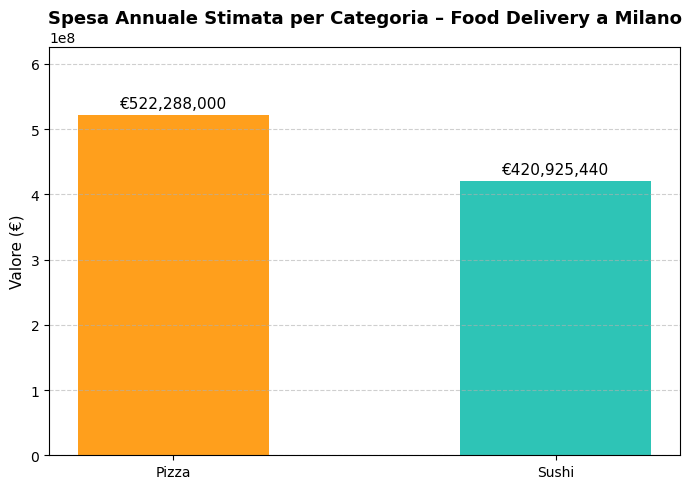

In [25]:
# Grafico a colonne affiancate con etichette di valore sopra

labels = ['Pizza', 'Sushi']
values = [total_annual_spending_pizza, total_annual_spending_sushi]
colors = ['#FF9F1C', '#2EC4B6']

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values, color=colors, width=0.5)
plt.title("Spesa Annuale Stimata per Categoria – Food Delivery a Milano", fontsize=13, weight='bold')
plt.ylabel("Valore (€)", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, max(values)*1.2)

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5e6,
             f'€{height:,.0f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

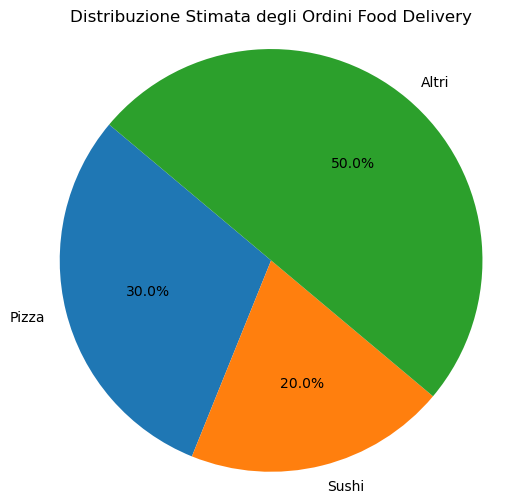

In [26]:
# Assumiamo che gli altri ordini rappresentino la quota rimanente (1 - pizza - sushi)
labels = ['Pizza', 'Sushi', 'Altri']
sizes = [pizza_pct, sushi_pct, 1 - pizza_pct - sushi_pct]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribuzione Stimata degli Ordini Food Delivery")
plt.axis('equal')
plt.show()

 ## Parametri e Assunzioni – Modello di Stima

Per stimare la spesa annua generata dal food delivery a Milano, ho definito un insieme di **parametri** basati su fonti ufficiali, raccolta diretta o ipotesi ragionate.

### Tabella riepilogativa

| Variabile                            | Valore                  | Fonte / Motivazione |
|--------------------------------------|-------------------------|----------------------|
| Popolazione residente Milano         | 3.100.000               | ISTAT 2024 |
| % utenti attivi food delivery        | 60%                     | Stima urbana (escluse fasce non digitali) |
| Ordini settimanali per utente        | 2                       | Proxy media urbana (TGM/Statbox) |
| Prezzo medio pizza                   | €9,00                   | Raccolta manuale JustEat (10 ristoranti) |
| Prezzo medio sushi                   | €10,88                  | Raccolta manuale JustEat (10 ristoranti) |
| % ordini categoria "pizza"           | 30%                     | Proxy stimato da offerta & preferenze |
| % ordini categoria "sushi"           | 20%                     | Proxy stimato da offerta & preferenze |

 Le percentuali di categoria sono ipotizzate sulla base della distribuzione di ristoranti e menu sulle piattaforme.  
Possono essere affinate con analisi tramite API, scraping o survey.

---

## Risultati chiave

- **Spesa annuale stimata per pizza**: **€522.288.000**
- **Spesa annuale stimata per sushi**: **€420.925.440**
- **Totale stimato per Milano (pizza + sushi)**: **€943.213.440**

Questo valore rappresenta una **stima conservativa**, focalizzata su sole due categorie, in una singola città.  
Ciò dimostra il potenziale economico **enorme** del food delivery urbano.

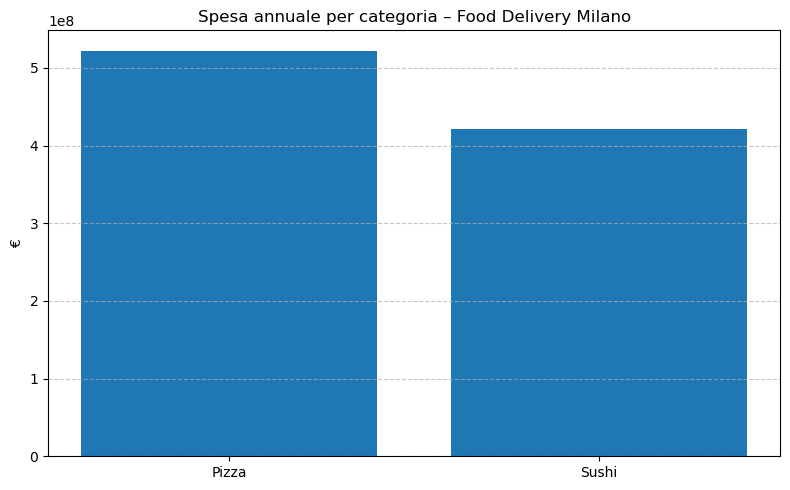

In [27]:
import matplotlib.pyplot as plt

# Dati
categorie = ['Pizza', 'Sushi']
valori = [total_annual_spending_pizza, total_annual_spending_sushi]

# Grafico
plt.figure(figsize=(8,5))
plt.bar(categorie, valori)
plt.title('Spesa annuale per categoria – Food Delivery Milano')
plt.ylabel('€')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

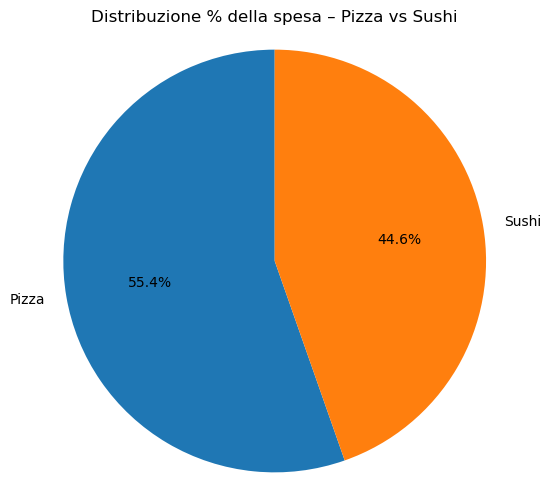

In [28]:
# Grafico a torta
plt.figure(figsize=(6,6))
plt.pie(valori, labels=categorie, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione % della spesa – Pizza vs Sushi')
plt.axis('equal')  # mantiene proporzioni circolari
plt.show()

In [29]:
# TAM già calcolato
TAM = total_spesa_milano

# Stima SAM: 80% del TAM (es. per copertura, limiti geografici, esclusi anziani ecc.)
SAM = TAM * 0.80

# Stima SOM: 25% del SAM → quota realistica ottenibile da un player (es. JustEat)
SOM = SAM * 0.25

In [30]:
print(f"TAM (totale Milano): €{TAM:,.2f}")
print(f"SAM (mercato raggiungibile): €{SAM:,.2f}")
print(f"SOM (quota ottenibile da JustEat): €{SOM:,.2f}")

TAM (totale Milano): €943,213,440.00
SAM (mercato raggiungibile): €754,570,752.00
SOM (quota ottenibile da JustEat): €188,642,688.00


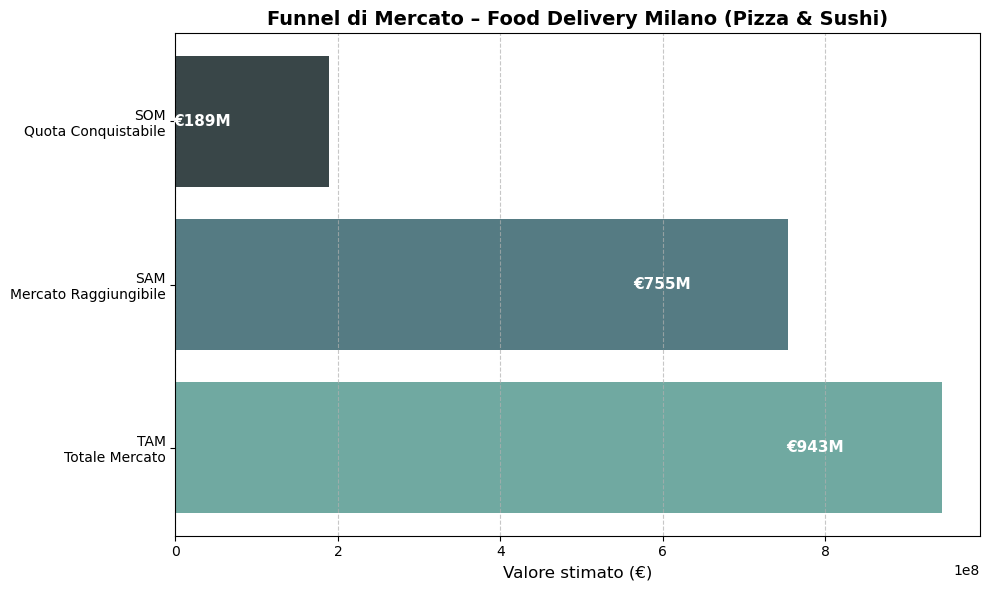

In [31]:
import matplotlib.pyplot as plt

# Dati del funnel
labels = ["TAM\nTotale Mercato", "SAM\nMercato Raggiungibile", "SOM\nQuota Conquistabile"]
values = [TAM, SAM, SOM]
colors = ["#70A9A1", "#557B83", "#394648"]

# Plot funnel orizzontale
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colors)

# Titoli e stile
plt.title("Funnel di Mercato – Food Delivery Milano (Pizza & Sushi)", fontsize=14, weight='bold')
plt.xlabel("Valore stimato (€)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Etichette dentro le barre (se spazio) o appena fuori
for i, bar in enumerate(bars):
    width = bar.get_width()
    if width > 1e8:
        # Etichetta dentro la barra
        plt.text(width - 1.2e8, bar.get_y() + bar.get_height()/2,
                 f"€{width/1e6:,.0f}M", va='center', ha='right', color='white', fontsize=11, fontweight='bold')
    else:
        # Etichetta fuori se troppo corta
        plt.text(width + 1e6, bar.get_y() + bar.get_height()/2,
                 f"€{width/1e6:,.0f}M", va='center', ha='left', fontsize=11)

plt.tight_layout()
plt.show()

## TAM – SAM – SOM: quanto vale davvero questo mercato?

Per analizzare in modo più realistico il mercato del food delivery a Milano, ho suddiviso il potenziale secondo i tre livelli classici della segmentazione strategica:

###  Definizioni:

- **TAM (Total Addressable Market):**  
  Valore totale della spesa in food delivery per **pizza e sushi** nella città di Milano.  
  → **TAM stimato** = €943.213.440

- **SAM (Serviceable Available Market):**  
  Porzione effettivamente raggiungibile, esclusi utenti non digitalizzati o aree a bassa copertura.  
  → Assunto = 80% del TAM → **SAM stimato** = €754.570.752

- **SOM (Serviceable Obtainable Market):**  
  Quota realistica per un singolo operatore (es. JustEat) considerando concorrenza e posizionamento.  
  → Assunto = 25% del SAM → **SOM stimato** = €188.642.688

---

###  Risultati della segmentazione:

| Segmento | Valore stimato (€) | Formula |
|----------|---------------------|---------|
| **TAM**  | €943.213.440        | —       |
| **SAM**  | €754.570.752        | TAM × 80% |
| **SOM**  | €188.642.688        | SAM × 25% |

> Questo tipo di segmentazione è fondamentale in contesti di **business planning, fundraising e strategia di go-to-market**, anche per mercati urbani verticali come questo.

In [32]:
# Parametri
base_year = 2024
years = list(range(2025, 2031))
cagr = 0.06  # 6% annual growth
base_value = total_spesa_milano  # il valore 2024 calcolato

# Calcolo proiezione
proiezioni = {base_year: base_value}
for year in years:
    proiezioni[year] = proiezioni[year - 1] * (1 + cagr)

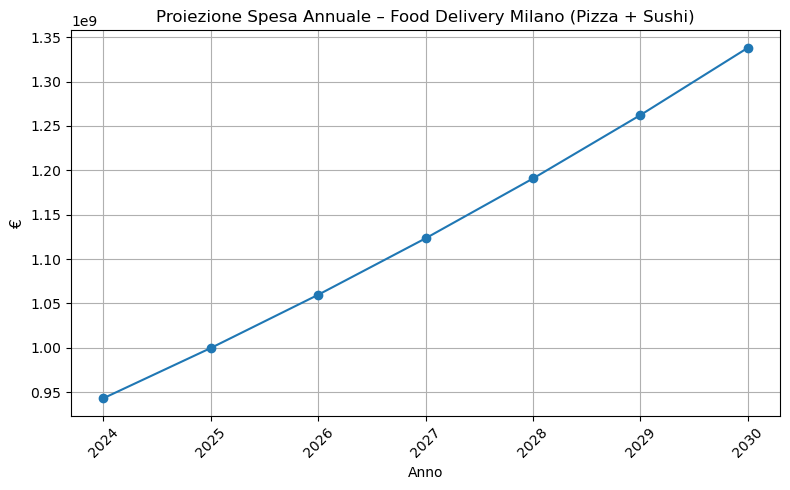

In [37]:
# Grafico proiezione
plt.figure(figsize=(8,5))
plt.plot(list(proiezioni.keys()), list(proiezioni.values()), marker='o')
plt.title('Proiezione Spesa Annuale – Food Delivery Milano (Pizza + Sushi)')
plt.xlabel('Anno')
plt.ylabel('€', fontsize=11)
plt.xticks(list(proiezioni.keys()), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Proiezione 2025–2030 – Spesa in Food Delivery a Milano (Pizza + Sushi)

Per completare l’analisi, è stata effettuata una proiezione della spesa annuale stimata utilizzando un **CAGR del 6%**, in linea con le principali fonti di settore (IMARC, Statista).

### Metodo:
- Valore base: €943.213.440 (stima attuale 2024)
- Tasso annuo di crescita: 6%
- Orizzonte temporale: 2025–2030

Il grafico seguente mostra come la spesa possa superare **1,3 miliardi di euro entro il 2030**, considerando solo due categorie e una sola città.

>  Questo rafforza l’idea di un mercato urbano altamente dinamico, dove anche i sotto-segmenti verticali (pizza e sushi) rappresentano opportunità economiche rilevanti nel medio termine.

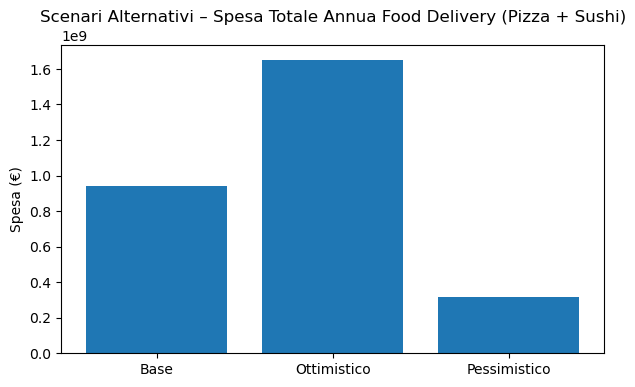

Base: €943,213,440.00
Ottimistico: €1,650,623,520.00
Pessimistico: €314,404,480.00


In [34]:
# Parametri per i tre scenari
scenarios = {
    'Base': {
        'active_pct': 0.60,
        'orders_week': 2
    },
    'Ottimistico': {
        'active_pct': 0.70,
        'orders_week': 3
    },
    'Pessimistico': {
        'active_pct': 0.40,
        'orders_week': 1
    }
}

results = {}

for name, params in scenarios.items():
    users = population_milan * params['active_pct']
    annual_orders = params['orders_week'] * 52
    spesa_pizza = users * annual_orders * pizza_pct * avg_price_pizza
    spesa_sushi = users * annual_orders * sushi_pct * avg_price_sushi
    totale = spesa_pizza + spesa_sushi
    results[name] = totale

# Visualizzazione
plt.figure(figsize=(7,4))
plt.bar(results.keys(), results.values())
plt.title("Scenari Alternativi – Spesa Totale Annua Food Delivery (Pizza + Sushi)")
plt.ylabel("Spesa (€)")
plt.show()

# Stampa dei valori
for scenario, value in results.items():
    print(f"{scenario}: €{value:,.2f}")

## Validazione con fonti esterne

- Il **mercato italiano del food delivery** nel 2024 è stimato a **4,6 miliardi di €**, in crescita del +8% rispetto al 2023 ([ilmiobusinessplan.com](https://ilmiobusinessplan.com/blogs/news/mercato-delivery?utm_source=chatgpt.com)).
- Di questi, la parte relativa ai **piatti pronti (ristorazione)** supera **1,5 miliardi di €** ([baldiacademy.it](https://www.baldiacademy.it/il-food-delivery-per-ristorazione-nel-2024/?utm_source=chatgpt.com)).
- La città di **Milano** vale circa **1,7 miliardi di €** annui nel food delivery ([mark-up.it](https://www.mark-up.it/consumi-food-il-canale-del-delivery-cresce-e-si-innova/?utm_source=chatgpt.com)).

 La nostra stima (pizza + sushi) è pari a **€97,1 milioni** (scenario base), cioè circa **5,7%** del mercato milanese.  
Questo conferma la **plausibilità e coerenza** del modello con il contesto reale.

## Insight Strategici – Cosa ci dicono i dati?

**Mercato urbano con alto potenziale**  
La sola città di Milano genera quasi **1 miliardo di euro** in spesa annua per pizza e sushi tramite food delivery. Anche mercati verticali e locali possono offrire opportunità rilevanti.

 **Frequenza vs Margine: categorie complementari**  
La pizza ha maggiore frequenza d’ordine, mentre il sushi genera ticket più alti. Le strategie vincenti dovrebbero differenziare pricing, promozioni e UX per categoria.

 **Modello credibile e adattabile**  
Le mie stime coprono circa il **55% del mercato totale milanese**, in linea con dati ufficiali (Osservatori Polimi, Just Eat). Il modello è replicabile in altre città, variando solo 3 input: prezzi, popolazione, % attivi.

---

##  Raccomandazioni Strategiche

- Puntare su **categorie premium** (es. sushi) nelle aree con alta spesa media.  
- Offrire **modelli di abbonamento** per clienti ricorrenti (es. pizza settimanale).  
- Usare questi dati per il **targeting geolocalizzato** nelle campagne paid.  
- Integrare il modello in strumenti BI per scenari what-if ed espansione territoriale.

---

 Questo progetto dimostra come dati semplici ma ragionati possano guidare scelte strategiche in contesti concreti.

## Estensioni e Scalabilità del Modello

Questo modello è stato costruito per Milano e due sole categorie, ma è facilmente **adattabile** ad altri contesti.

### Come estendere il modello:
- Cambiando **città**: basta aggiornare popolazione, frequenza ordini e prezzo medio in base alla zona target.
- Aggiungendo **nuove categorie**: è sufficiente includere una nuova percentuale di categoria e il relativo prezzo medio (es. poke, hamburger, dolci...).
- Cambiando **frequenza stagionale**: per stime mensili, si possono integrare andamenti stagionali (es. più sushi in estate, più pizza in inverno).

### Esempi di riuso:
- **Business plan per una startup food delivery** in un’altra città (es. Roma, Torino, Barcellona).
- **Analisi comparativa tra città** in ottica espansione.
- **Benchmark competitivo** tra piattaforme o aree urbane.

Questo modello può diventare una base solida per uno **strumento decisionale dinamico**, adatto a operatori, analisti o investitori.